In [1]:
import numpy as np
import scipy as sp
import scipy.stats
import scipy.optimize
from ballot_comparison import ballot_comparison_pvalue
from hypergeometric import trihypergeometric_optim
from fishers_combination import fisher_combined_pvalue, maximize_fisher_combined_pvalue, \
    plot_fisher_pvalues

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
N1 = 10000
N2 = 1000
N_w1 = 4550
N_l1 = 4950
N_w2 = 750
N_l2= 150
margin = (N_w1 + N_w2 - N_l1 - N_l2)

n1 = 500
n2 = 250

cvr_pvalue = lambda alloc: ballot_comparison_pvalue(n=n1, gamma=1.03905, o1=0, u1=0, o2=0, u2=0, 
                                                    reported_margin=margin, N=N1, null_lambda=alloc)
nocvr_pvalue = lambda alloc: trihypergeometric_optim(sample= np.array([0]*int(n2*N_l2/N2)+[1]*int(n2*N_w2/N2)+[np.nan]*int(n2*(N2-N_l2-N_w2)/N2)), 
                                                     popsize=N2, 
                                                     null_margin=(N_w2-N_l2) - alloc*margin)

In [3]:
# This is one possible allocation lambda=0.3
pvalues = [cvr_pvalue(0.3), nocvr_pvalue(0.7)]
print(pvalues)
fisher_pvalue = fisher_combined_pvalue(pvalues)
print(fisher_pvalue)

[0.23557770396261943, 0.001425699715253263]
0.00302236691268


-9 11
-9.0 0
-8.5 0
-8.0 0
-7.5 0
-7.0 0
-6.5 0
-6.0 0
-5.5 0
-5.0 0.0
-4.5 0.0
-4.0 0.0
-3.5 0.0
-3.0 0.0
-2.5 0.0
-2.0 0.0
-1.5 0.0
-1.0 1.07247544179e-13
-0.5 2.09982869981e-08
0.0 0.000201206808265
0.5 0.010103481892
1.0 0.0259274436535
1.5 0.00575285367914
2.0 0.000645115294631
2.5 6.78091214908e-05
3.0 0
3.5 0
4.0 0
4.5 0
5.0 0
5.5 0
6.0 0
6.5 0
7.0 0
7.5 0
8.0 0
8.5 0
9.0 0
9.5 0
10.0 0
10.5 0
11.0 0
11.5 0


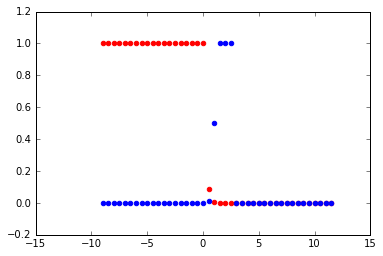

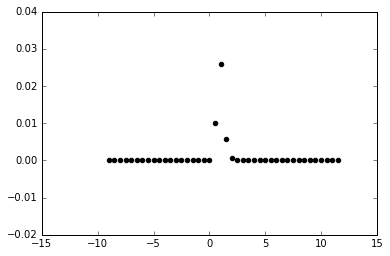

In [4]:
# find range of possible lambda
lambda_upper = int(np.min([2*N1/margin, 1+2*N2/margin]))
lambda_lower = int(np.max([-2*N1/margin, 1-2*N2/margin]))

print(lambda_lower, lambda_upper)

fisher_pvalues = []
cvr_pvalues = []
nocvr_pvalues = []
for lam in np.arange(lambda_lower, lambda_upper+1, 0.5):
#for lam in np.arange(0, 1, 0.05):
    cvr_pvalues.append(np.min([1, cvr_pvalue(lam)]))
    nocvr_pvalues.append(nocvr_pvalue(1-lam))
    fisher_pvalues.append(fisher_combined_pvalue([cvr_pvalues[-1], nocvr_pvalues[-1]]))
    print(lam, fisher_pvalues[-1])    
    
plt.scatter(np.arange(lambda_lower, lambda_upper+1, 0.5), cvr_pvalues, color='r')
plt.scatter(np.arange(lambda_lower, lambda_upper+1, 0.5), nocvr_pvalues, color='b')
plt.show()

plt.scatter(np.arange(lambda_lower, lambda_upper+1, 0.5), fisher_pvalues, color='black')
plt.show()



In [5]:
maximize_fisher_combined_pvalue(N=(N1, N2), overall_margin=margin, 
                          pvalue_funs=(cvr_pvalue, nocvr_pvalue))

{'allocation lambda': 0.93248039808125949,
 'max_pvalue': 0.027011101425504891,
 'min_chisq': 10.960538840556488}